In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt

In [2]:
df = pd.read_csv('../Loan Prediction III/train.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

C:\Users\vajrapra\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

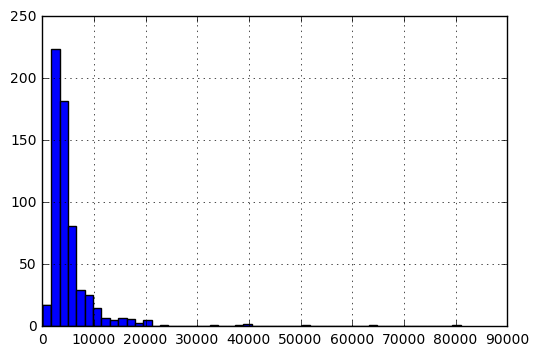

In [6]:
df['ApplicantIncome'].hist(bins=50)

C:\Users\vajrapra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xb3fe048>],
 'caps': [<matplotlib.lines.Line2D at 0xb4029e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xb409be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb4093c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb3fea58>,
  <matplotlib.lines.Line2D at 0xb3febe0>]}

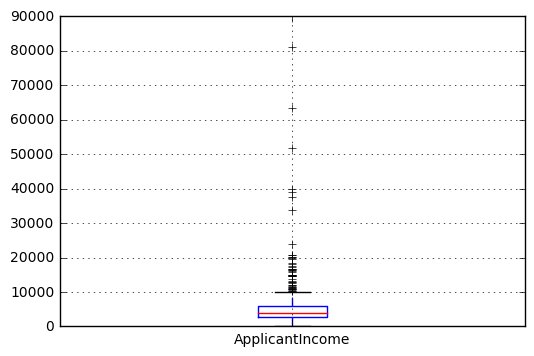

In [7]:
df.boxplot(column='ApplicantIncome')

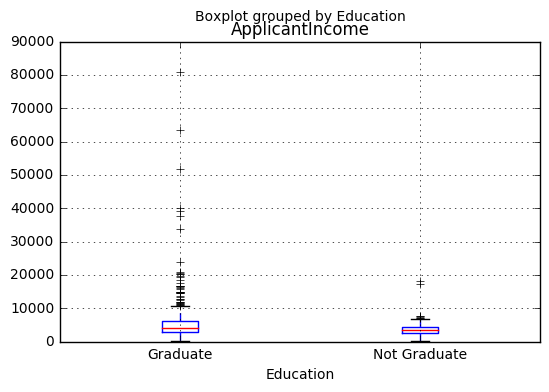

In [8]:
df.boxplot(column='ApplicantIncome', by ='Education')

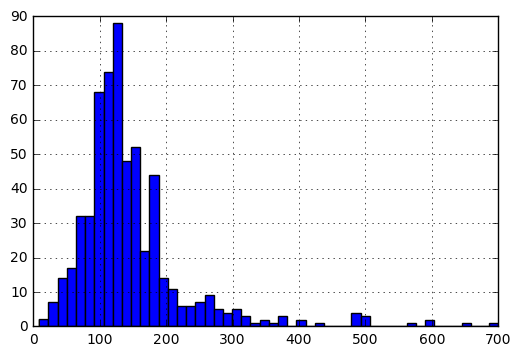

In [9]:
df['LoanAmount'].hist(bins =50)

C:\Users\vajrapra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xb62a940>],
 'caps': [<matplotlib.lines.Line2D at 0xb632c50>,
 'fliers': [<matplotlib.lines.Line2D at 0xb63cba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb638cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb62abe0>,
  <matplotlib.lines.Line2D at 0xb632ac8>]}

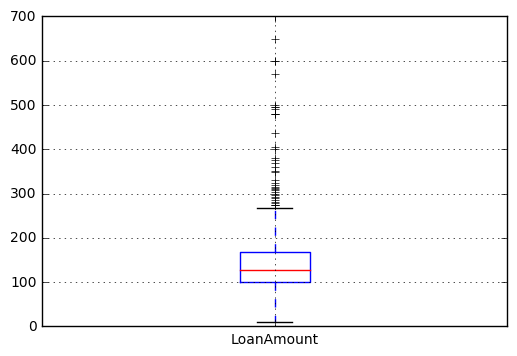

In [10]:
df.boxplot(column='LoanAmount')

In [11]:
df.loc[(df["Gender"]=="Female") & (df["Education"] == "Not Graduate") & (df["Loan_Status"] =="Y"),["Gender", "Education", "Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [12]:
#create a new function:
def num_missing(x):
    return sum(x.isnull())

# Applying per column:
print("Missing values per column:")
print(df.apply(num_missing,axis =0)) #axis=0 implies function applies to each column of data frame df

#Applying per row:
print("\nMissing values per row:")
print(df.apply(num_missing,axis =1).head()) #axis=1 implies function applies to each row of data frame df

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
0    1
1    0
2    0
3    0
4    0
dtype: int64


In [13]:
# Pivot table
impute_grps = df.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc =np.mean)
print (impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556


In [14]:
print (impute_grps.loc["Male","Yes","Yes"].values[0])

169.355555556


In [15]:
for i, row in df.loc[df["LoanAmount"].isnull(),:].iterrows():
    ind = tuple([row["Gender"],row["Married"],row["Self_Employed"]])

In [16]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [17]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(df["Credit_History"], df["Loan_Status"], margins = True).apply(percConvert, axis =1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [18]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

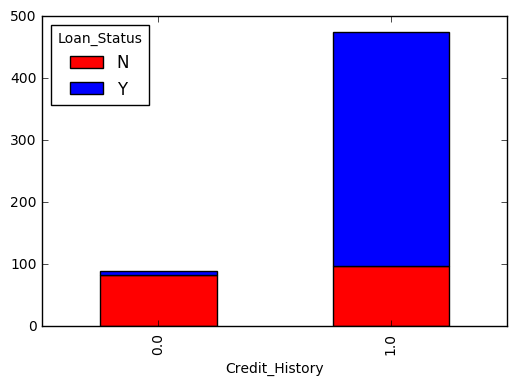

In [23]:
temp1 = pd.crosstab(df["Credit_History"],df["Loan_Status"])
temp1.plot(kind = "bar", stacked = True, color =["red","blue"], grid = False)

In [31]:
temp2 = df.pivot_table(values=["Loan_Status"], index=["Credit_History","Gender"], aggfunc = np.count_nonzero)
temp2.plot(kind = "bar", stacked = True, color =["red","blue"], grid = False)

SyntaxError: invalid syntax (<ipython-input-31-50bd3226fc5a>, line 1)